<a href="https://colab.research.google.com/github/rosanmohan/Time_Series/blob/main/Time_Series_UnFoldDataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as snsm
from pylab import rcParams
rcParams['figure.figsize']=20,5

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/All_Datasets/Electric_Production/Electric_Production.csv')

In [ ]:
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [ ]:
df=df.rename(columns={'DATE':'date','IPG2211A2N':'units'})
df.head()

,date,units
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [ ]:
df.set_index('date',inplace=True)

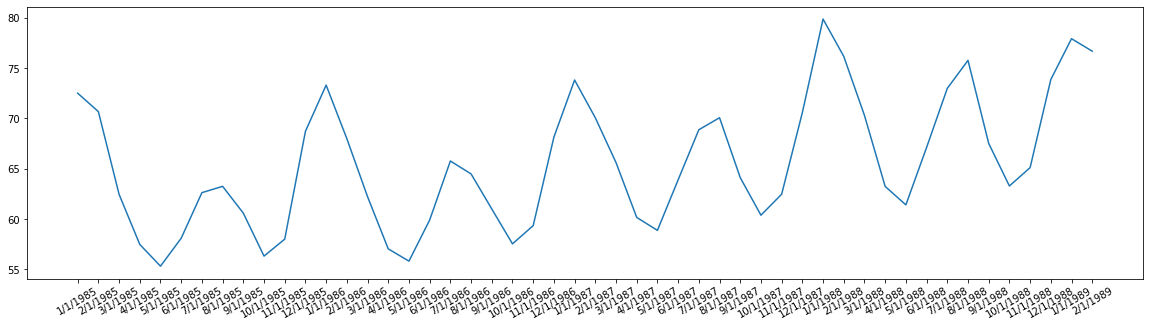

In [ ]:
plt.plot(df[0:50]['units'])
plt.xticks(rotation=30)
plt.show()

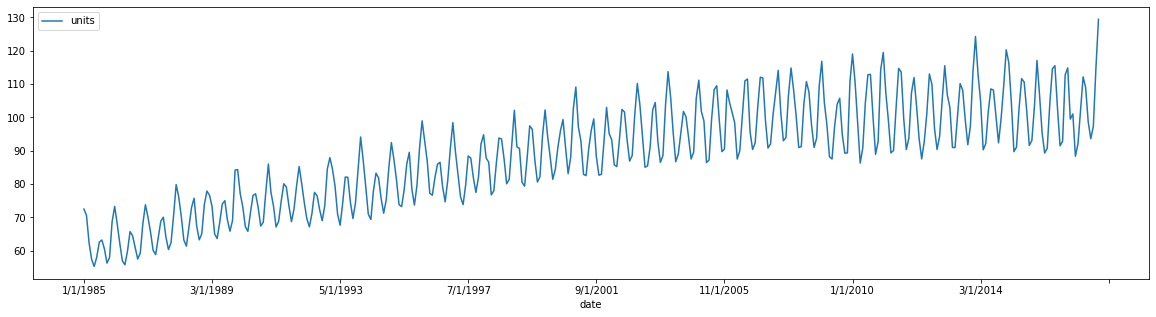

In [ ]:
df.plot()

<!-- Moving avarage method -->

# Moving avarage methods.

In [ ]:
# rolling avarage transform.
rolling_series_w5=df.rolling(window=5)
rolling_mean_w5=rolling_series_w5.mean()
rolling_mean_w5.head(10)

,units
date,
1/1/1985,NaN
2/1/1985,NaN
3/1/1985,NaN
4/1/1985,NaN
5/1/1985,63.68278
6/1/1985,60.79982
7/1/1985,59.18946
8/1/1985,59.34912
9/1/1985,59.97176


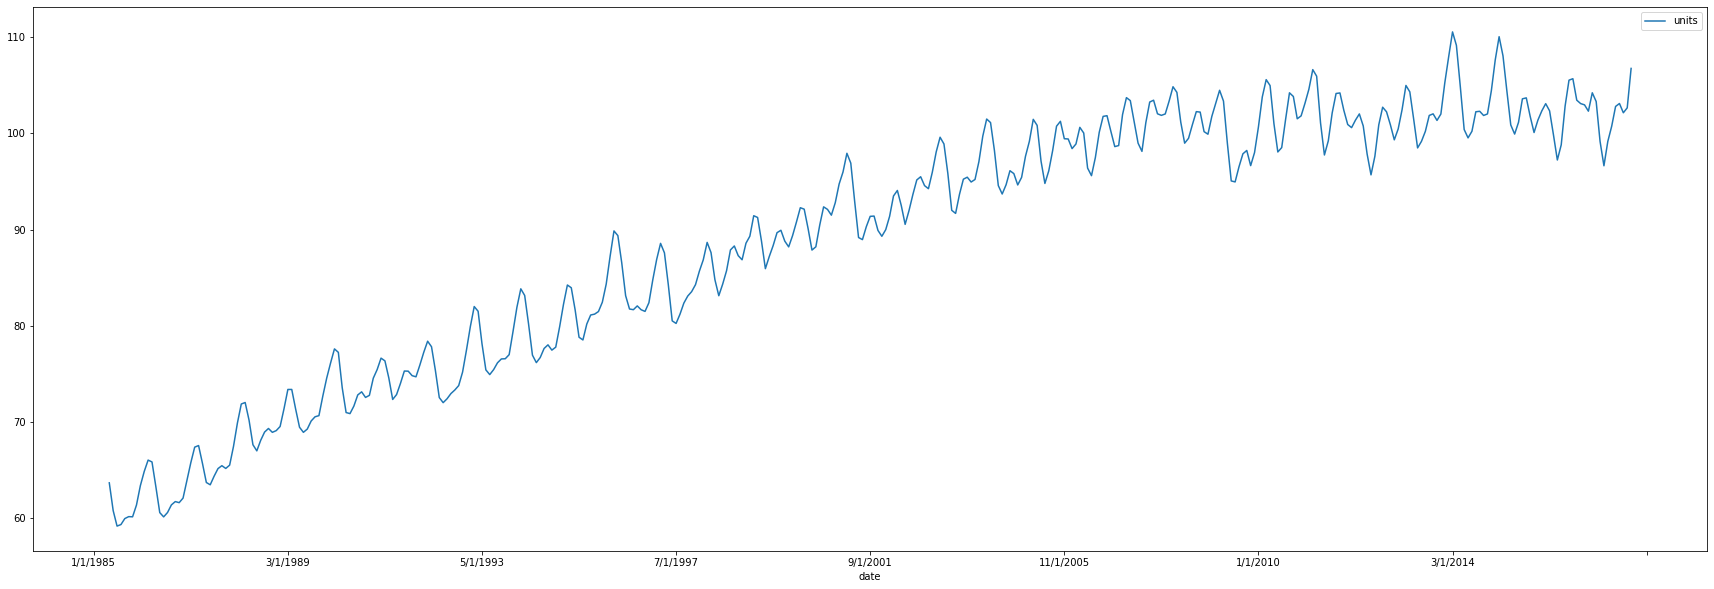

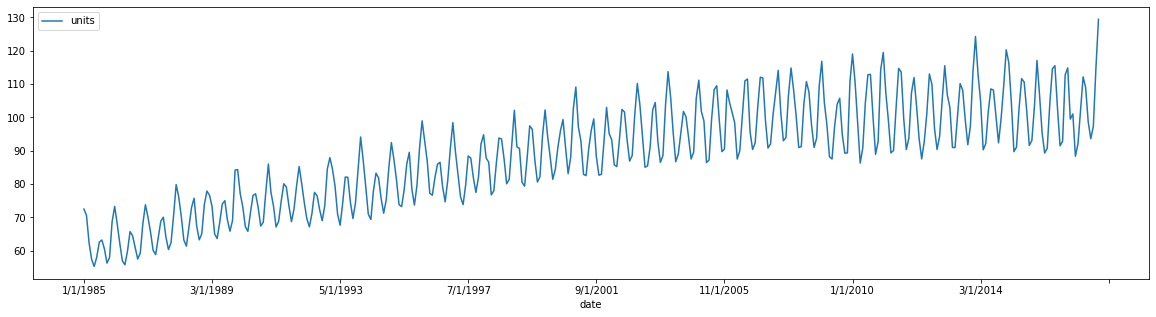

In [ ]:
rolling_mean_w5.plot(figsize=(30,10))
df.plot()

In [ ]:
df_rolling_mean_w5=df.join(rolling_mean_w5,rsuffix='_rolling_w5')

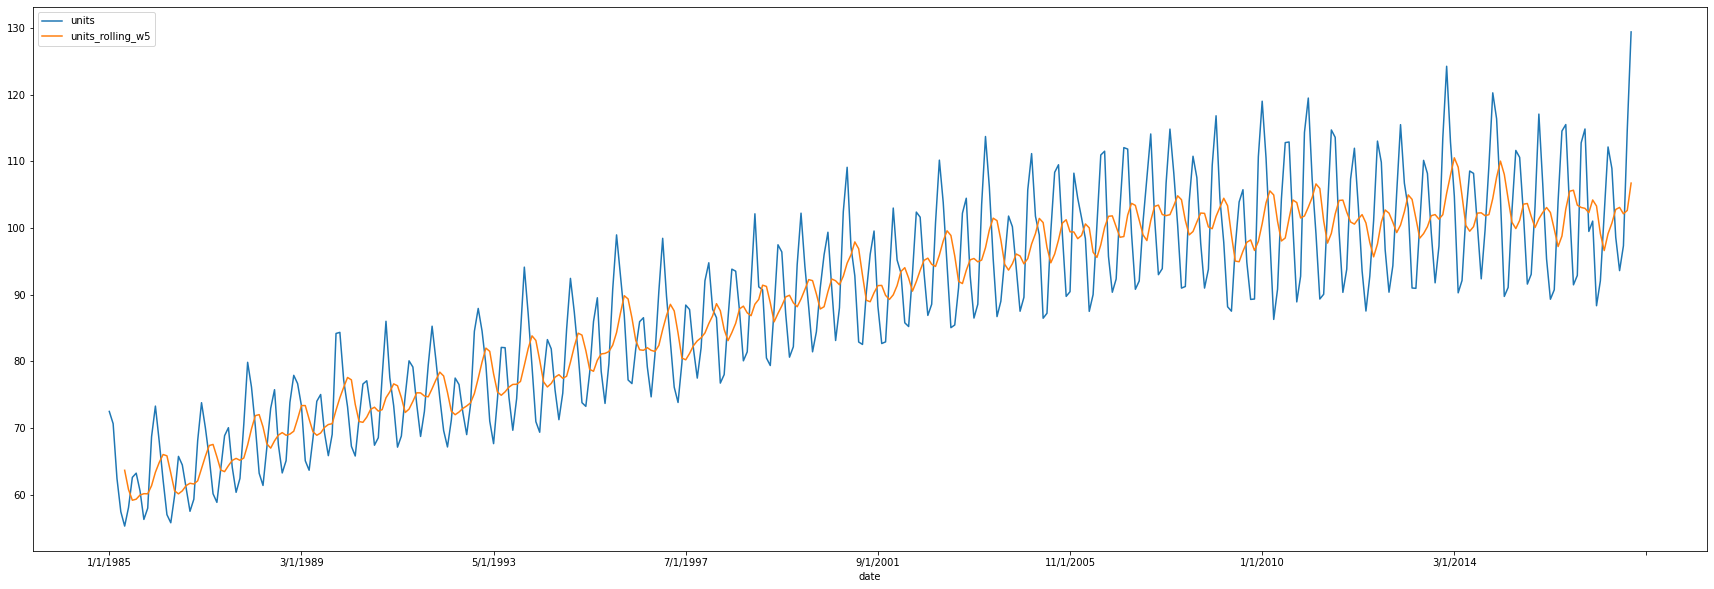

In [ ]:
df_rolling_mean_w5.plot(figsize=(30,10))

In [ ]:
# rolling avarage transform.
rolling_series_w10=df.rolling(window=10)
rolling_mean_w10=rolling_series_w10.mean()
df_rolling_mean_w10=df_rolling_mean_w5.join(rolling_mean_w10,rsuffix='_rolling_w10')

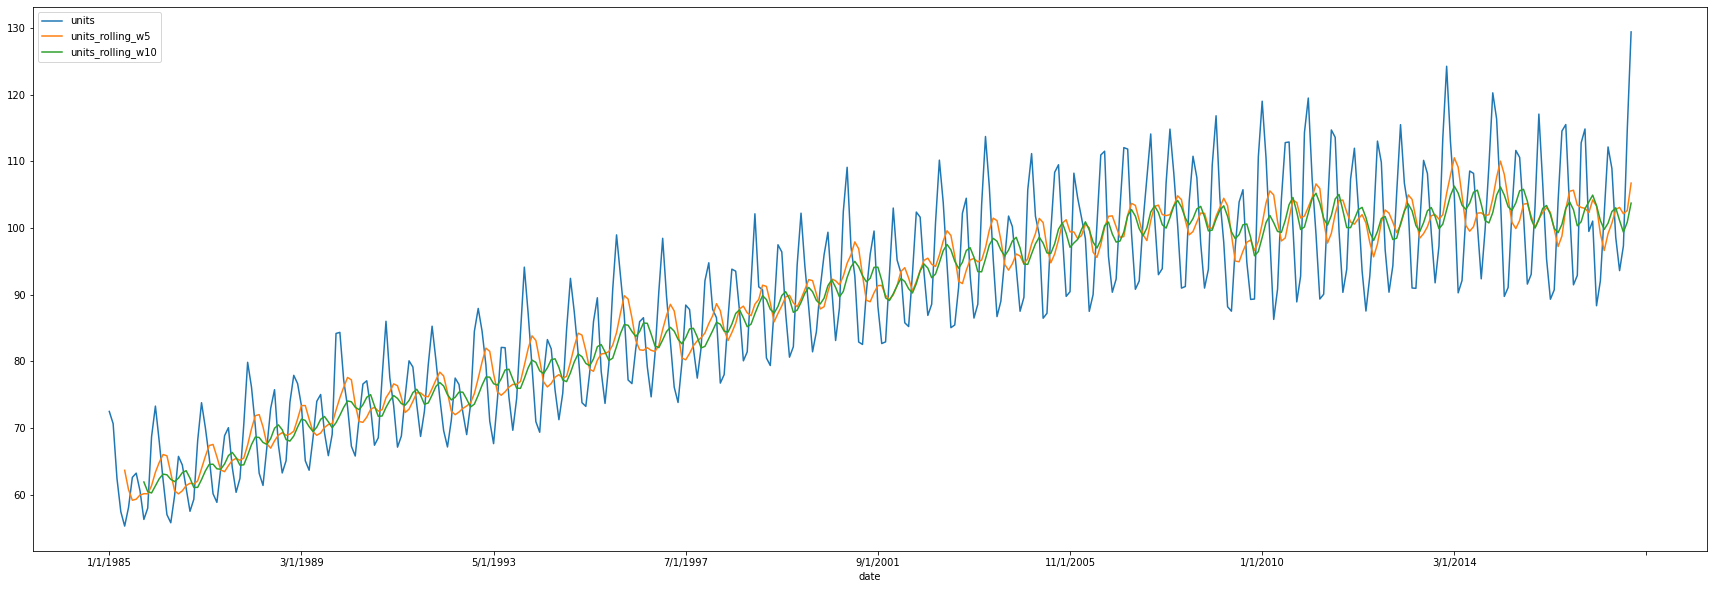

In [ ]:
df_rolling_mean_w10.plot(figsize=(30,10))

# Simple exponential smoothing.

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing, Holt

In [ ]:
fit1=SimpleExpSmoothing(df).fit(smoothing_level=0.2,optimized=False)
fit2=SimpleExpSmoothing(df).fit(smoothing_level=0.8,optimized=False)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


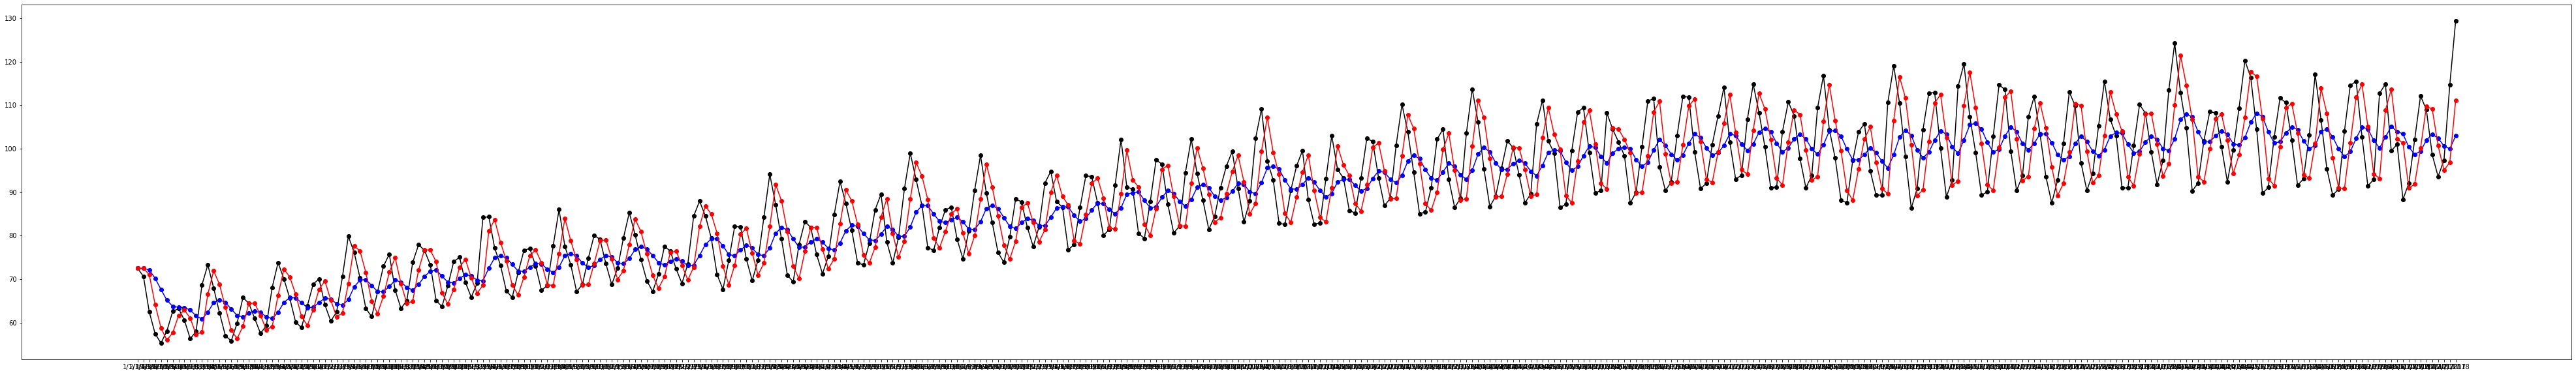

In [ ]:
plt.figure(figsize=(70,10))
plt.plot(df,marker='o',color='black')
plt.plot(fit1.fittedvalues,marker='o',color='blue')
plt.plot(fit2.fittedvalues,marker='o',color='red')
plt.show()

# Holt Method.

In [ ]:
holt_fit1=Holt(df).fit()
holt_fit2=Holt(df,exponential=True).fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


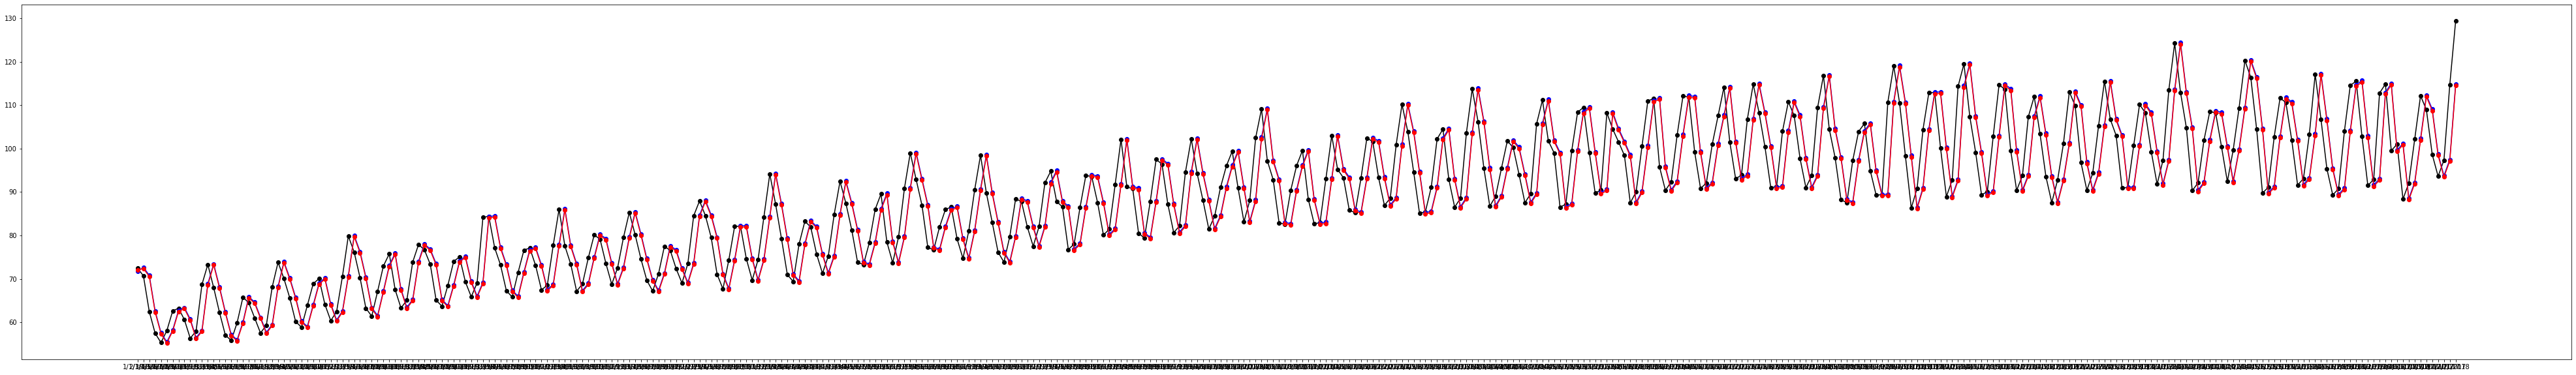

In [ ]:
plt.figure(figsize=(70,10))
plt.plot(df,marker='o',color='black')
plt.plot(holt_fit1.fittedvalues,marker='o',color='blue')
plt.plot(holt_fit2.fittedvalues,marker='o',color='red')
plt.show()

# Seasonal decompose and Adfuller test.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
from dateutil.parser import parse
import pandas as pd

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/All_Datasets/Australia_drug_sales/Monthly_anti-diabetic_drug_sales_in_Australia_from_1991_to_2008.csv',parse_dates=['time'],index_col='time')

In [ ]:
df1.head()

,Unnamed: 0,X,value
time,,,
1991-05-01,1,1,3.526591
1991-01-01,2,2,3.180891
1991-01-01,3,3,3.252221
1991-01-01,4,4,3.611003
1991-01-01,5,5,3.565869


In [ ]:
df_drug=df1.loc[:,['value']]

In [ ]:
df_drug.head()

,value
time,
1991-05-01,3.526591
1991-01-01,3.180891
1991-01-01,3.252221
1991-01-01,3.611003
1991-01-01,3.565869


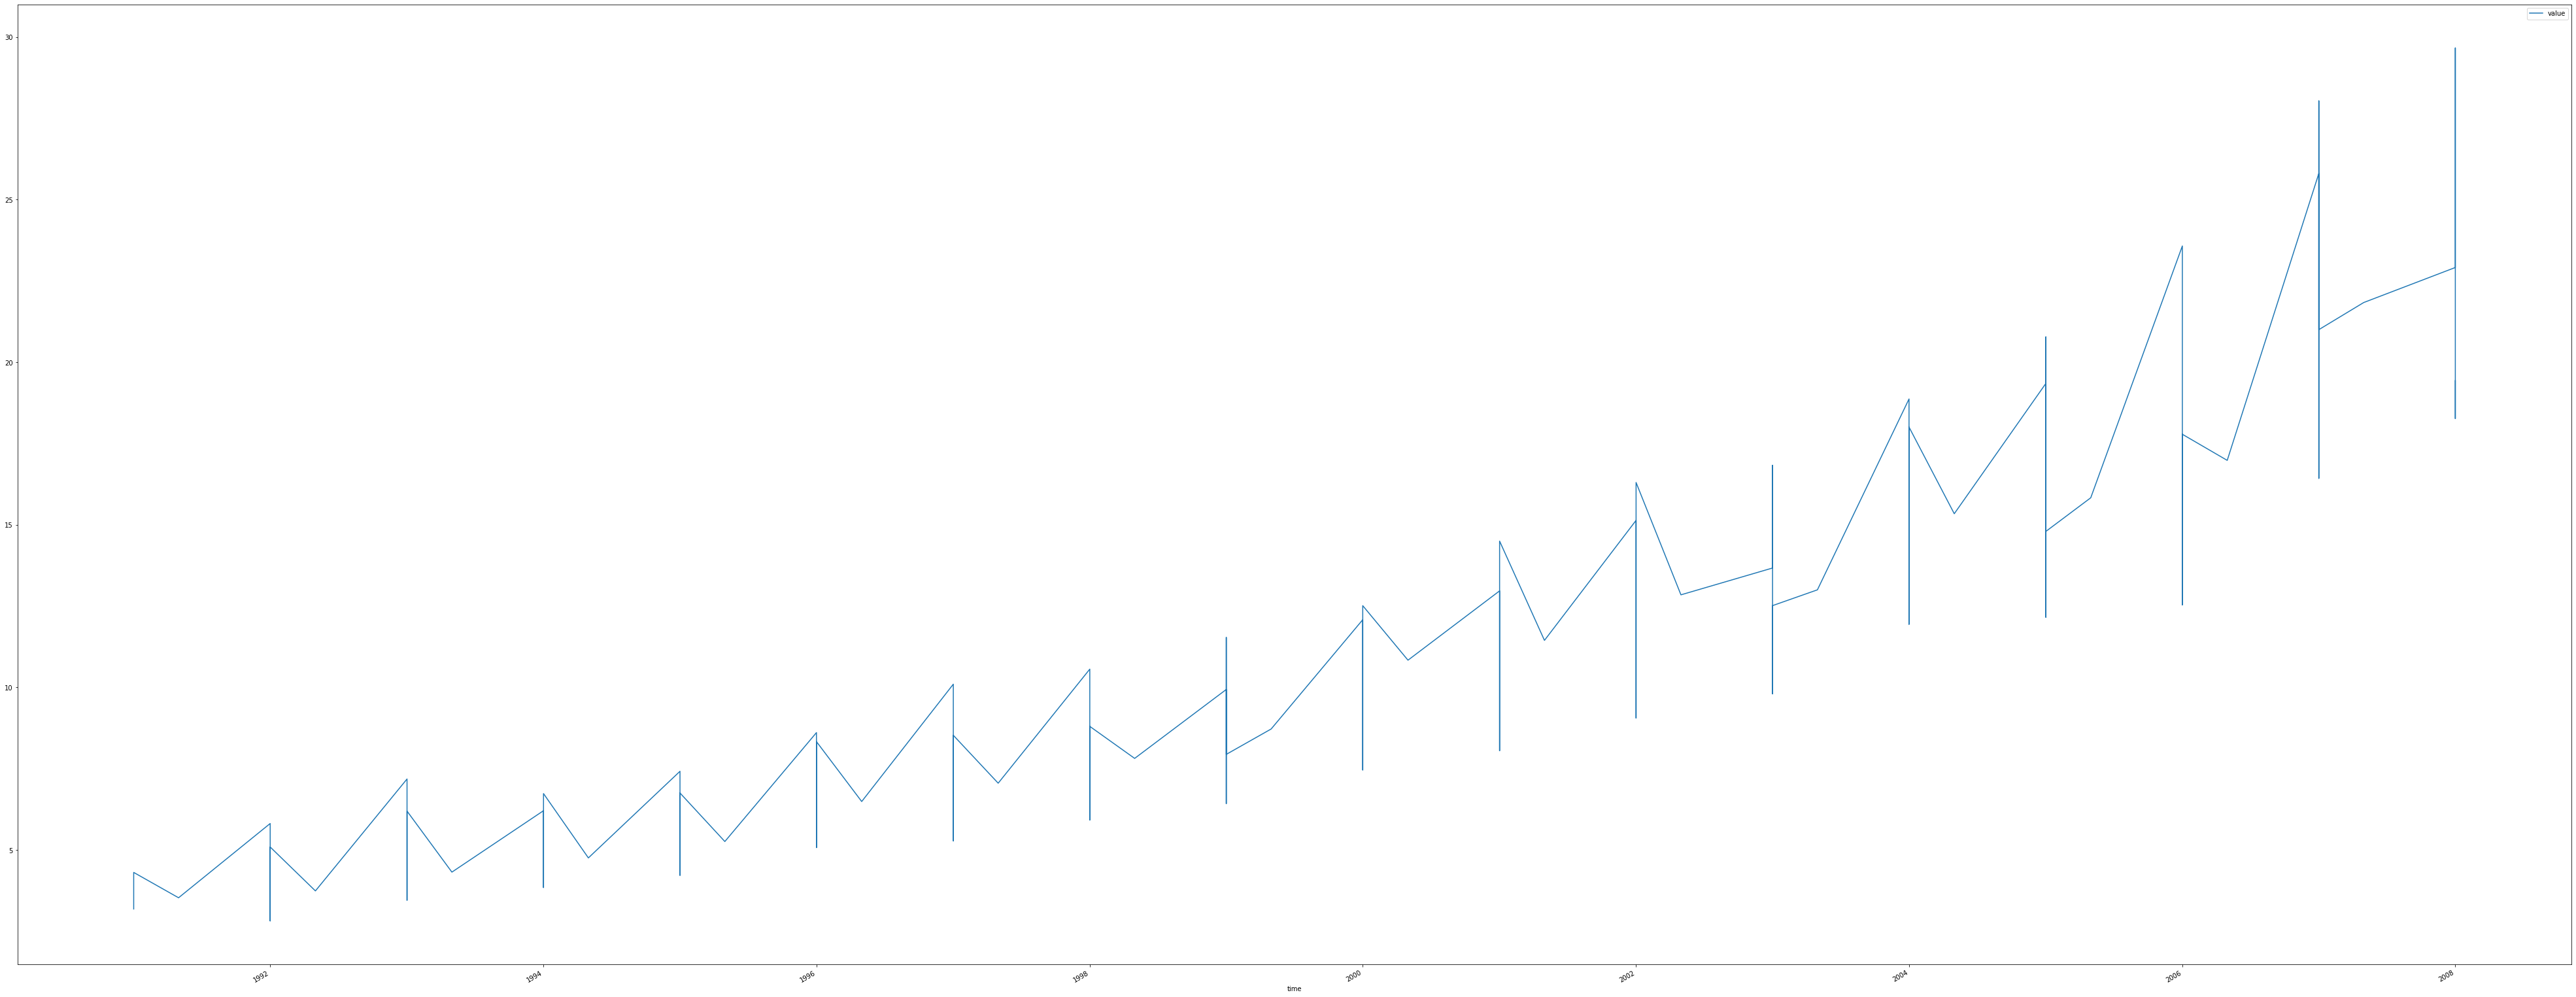

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
df_drug.plot(figsize=(70,30))

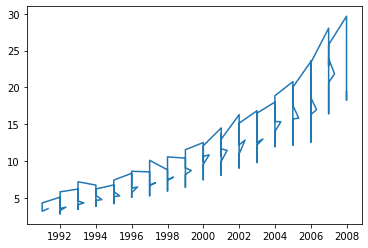

In [ ]:
plt.plot(df_drug['value'])

In [ ]:
df_drug.head()

,value
time,
1991-05-01,3.526591
1991-01-01,3.180891
1991-01-01,3.252221
1991-01-01,3.611003
1991-01-01,3.565869


In [ ]:
df_drug.reset_index(inplace=True)

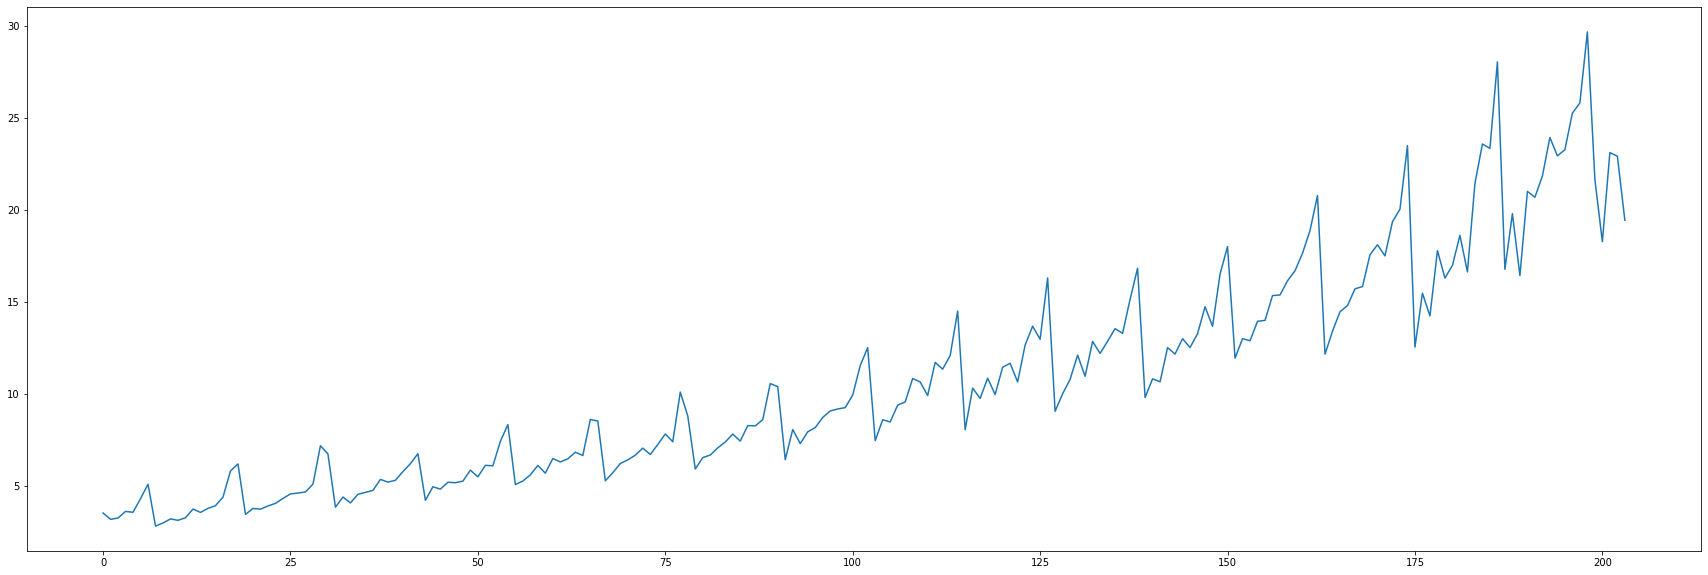

In [ ]:
df_drug['value'].plot(figsize=(30,10))

In [ ]:
# Multiplicative decomposition.
mul_result=seasonal_decompose(df_drug['value'],model='multiplicative',period=1)

add_result=seasonal_decompose(df_drug['value'],model='additive',period=1)

Text(0.5, 0.98, '\nMultiplicative decompose')

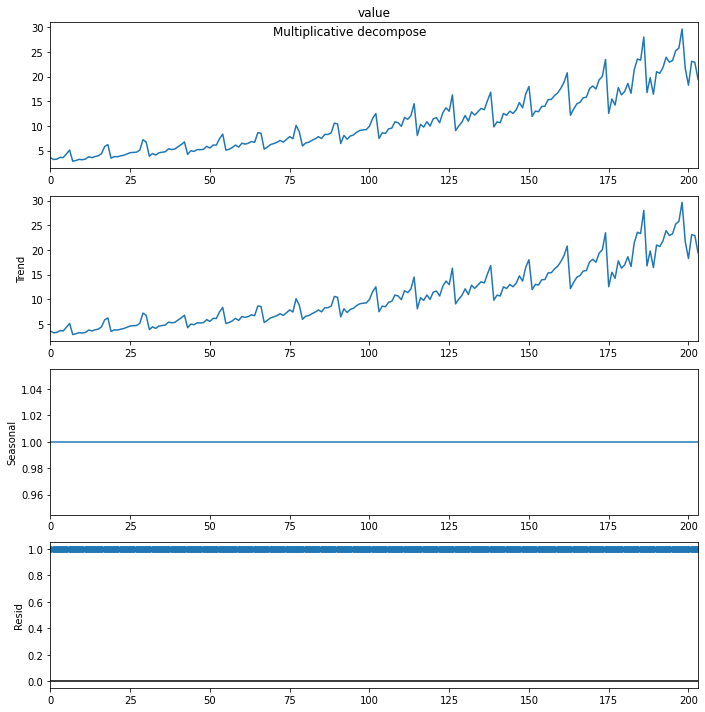

In [ ]:
plt.rcParams.update({'figure.figsize':(10,10)})
mul_result.plot().suptitle('\nMultiplicative decompose', fontsize=12)

Text(0.5, 0.98, '\nAdditive decompose')

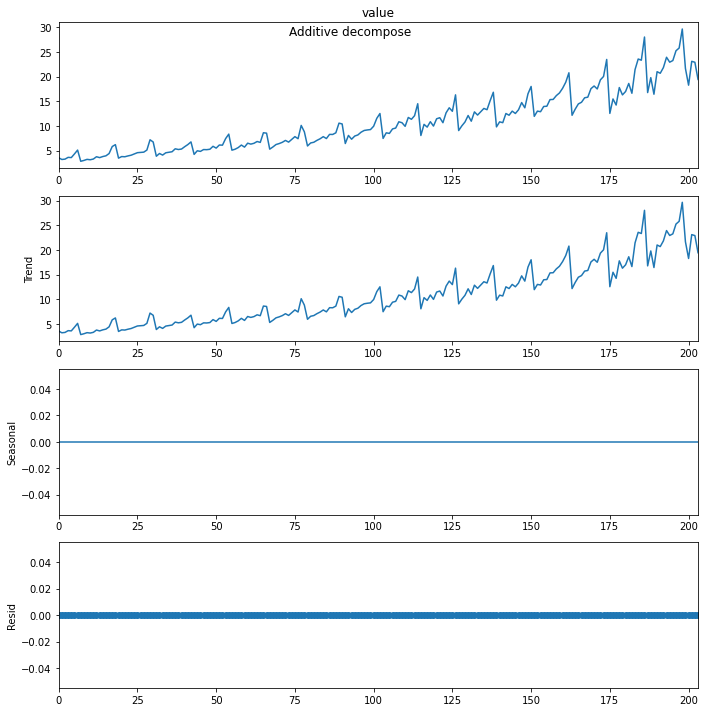

In [ ]:
plt.rcParams.update({'figure.figsize':(10,10)})
add_result.plot().suptitle('\nAdditive decompose', fontsize=12)

In [ ]:
# Additive.
new_df_add=pd.concat([add_result.seasonal, add_result.trend, add_result.resid, add_result.observed], axis=1)
new_df_add.columns=['seasonality','trend','residual','actual_values']
new_df_add.head()

,seasonality,trend,residual,actual_values
0,0.0,3.526591,0.0,3.526591
1,0.0,3.180891,0.0,3.180891
2,0.0,3.252221,0.0,3.252221
3,0.0,3.611003,0.0,3.611003
4,0.0,3.565869,0.0,3.565869


In [ ]:
# Multiplicative
new_df_mul=pd.concat([mul_result.seasonal, mul_result.trend, mul_result.resid, mul_result.observed], axis=1)
new_df_mul.columns=['seasonality','trend','residual','actual_values']
new_df_mul.head()

,seasonality,trend,residual,actual_values
0,1.0,3.526591,1.0,3.526591
1,1.0,3.180891,1.0,3.180891
2,1.0,3.252221,1.0,3.252221
3,1.0,3.611003,1.0,3.611003
4,1.0,3.565869,1.0,3.565869


In [ ]:
# Adfuller test to check stationarity.
from statsmodels.tsa.stattools import adfuller


In [ ]:
# ADF-test--- null hypothesis- non stationary-----if p value< 5% reject null hypothesis.
# If p value is > 5% then time series is non-stationary.

adfuller_result=adfuller(df_drug.value.values, autolag='AIC')

print(f'ADF Statistics : {adfuller_result[0]}')

print(f'p - Value : {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
  print('Critical value :')
  print(f'{key},{value}')


ADF Statistics : 3.1451856893067287
p - Value : 1.0
Critical value :
1%,-3.465620397124192
Critical value :
5%,-2.8770397560752436
Critical value :
10%,-2.5750324547306476


# Auto Regression, ACF and PACF.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

import matplotlib
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
from statsmodels.tsa.stattools import acf, pacf

In [ ]:
# To chat ACF and PACF model.
from statsmodels.tsa.stattools import acf, pacf

In [ ]:
# # Creating own time series.
# axisline=np.linspace(0,10,500)
# normalnumbers=np.random.normal(0,5,500)

axisline = np.linspace(0, 10, 500)


#normal distributed values
normalnumbers = np.random.normal(0,5,500)

In [ ]:
#exponential series to get the trend
ExponentialData = np.exp(axisline**0.5)

#adding normally distributed series in exponential series
y = normalnumbers+ExponentialData 

#plot
plt.figure(figsize=(16,7))
plt.plot(t,y)

NameError: ignored

<Figure size 1152x504 with 0 Axes>

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


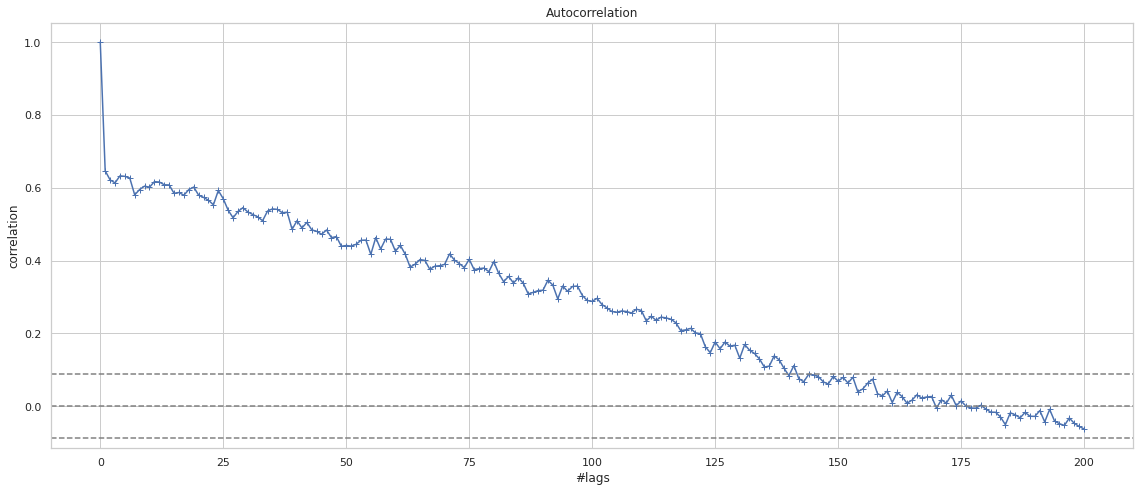

In [ ]:
#calling auto correlation function
ACF_lag= acf(y, nlags=200)



#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(ACF_lag,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Autocorrelation')
plt.xlabel('#lags')
plt.ylabel('correlation')
plt.tight_layout()


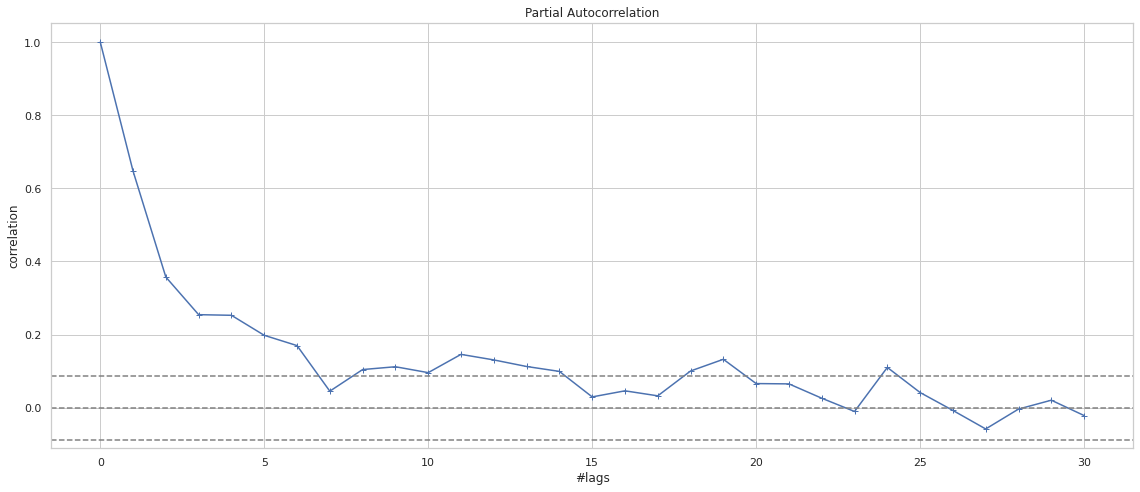

In [ ]:
#calling partial correlation function
PACF_lag = pacf(y, nlags=30, method='ols')

#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(PACF_lag,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation')
plt.xlabel('#lags')
plt.ylabel('correlation')
plt.tight_layout()